In [ ]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.0 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
from keras_tuner.tuners import RandomSearch

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
def build_model(hp):
  model=models.Sequential()
  model.add(layers.Conv2D(hp.Int('conv1_units', min_value=32, max_value=128, step=16),(3,3), activation='relu', input_shape=(32,32,3)))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(hp.Int('conv2_units', min_value=32, max_value=128, step=16),(3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(hp.Int('conv2_units', min_value=32, max_value=128, step=16),(3,3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(hp.Int('dense_units', min_value=32, max_value=128, step=16), activation='relu'))
  model.add(layers.Dropout(hp.Float('dropout_rate',min_value=0.0, max_value=0.5, step=0.1)))
  model.add(layers.Dense(10))

  optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))
  model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  return model

In [ ]:

from keras_tuner.tuners import RandomSearch
tuner= RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='cifar10_tunning'
)
tuner.search(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

model=tuner.hypermodel.build(best_hps)
history=model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Trial 10 Complete [00h 14m 23s]
val_accuracy: 0.10000000149011612

Best val_accuracy So Far: 0.671500027179718
Total elapsed time: 02h 16m 12s
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 41ms/step - accuracy: 0.3329 - loss: 1.7836 - val_accuracy: 0.5538 - val_loss: 1.2446
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.5544 - loss: 1.2521 - val_accuracy: 0.6171 - val_loss: 1.0843
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.6169 - loss: 1.0862 - val_accuracy: 0.6429 - val_loss: 1.0113
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.6509 - loss: 0.9903 - val_accuracy: 0.6722 - val_loss: 0.9210
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.6794 - loss: 0.9164 - val_accuracy: 0.6902 - val_loss: 0.8900
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.6961 - loss: 0.8508 - val_accuracy: 0.6965 - val_loss: 0.8779
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accurac

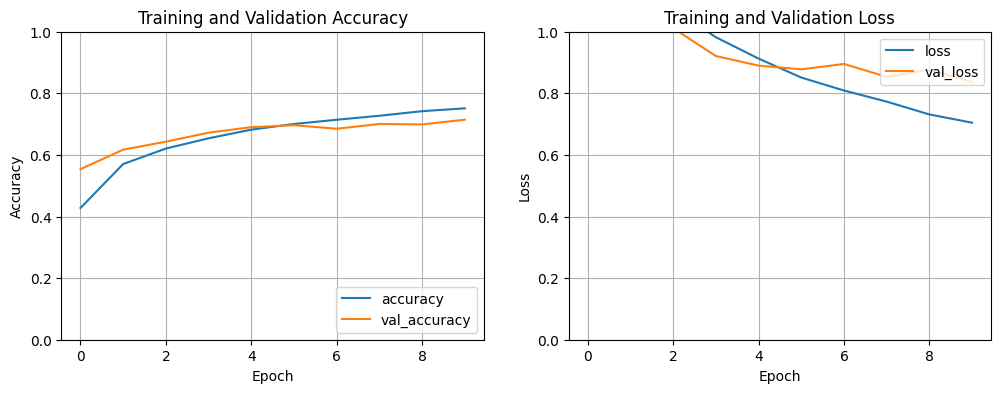

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()

plt.show()